# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
df = pd.DataFrame(data)

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

df_male.describe()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

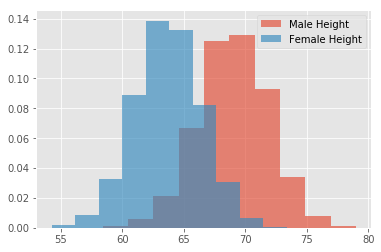

In [9]:
_ = plt.hist(df_male['Height'], bins=10, alpha=0.65, density=1,label='Male Height')
_ = plt.hist(df_female['Height'], bins=10, alpha=0.65, density=1, label='Female Height')
plt.legend()
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

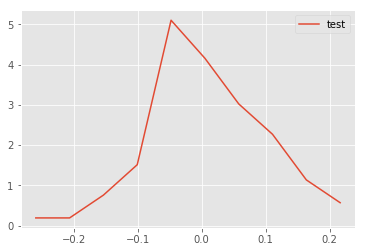

In [12]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

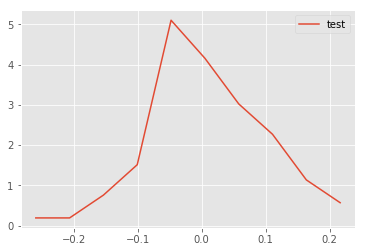

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [14]:
# You code here 
mx, my = density(df_male['Height'])
fx, fy = density(df_female['Height'])

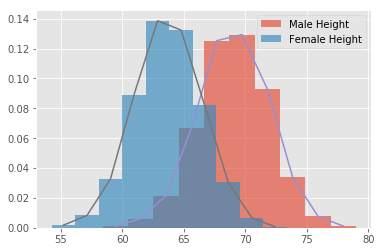

In [18]:
_ = plt.hist(df_male['Height'], bins=10, alpha=0.65, density=1,label='Male Height')
_ = plt.hist(df_female['Height'], bins=10, alpha=0.65, density=1, label='Female Height')
_ = plt.plot(mx, my)
_ = plt.plot(fx, fy)
plt.legend()
plt.show()

#### Repeat above exerice for male and female weights

In [19]:
# Your code here 
wmx, wmy = density(df_male['Weight'])
wfx, wfy = density(df_female['Weight'])

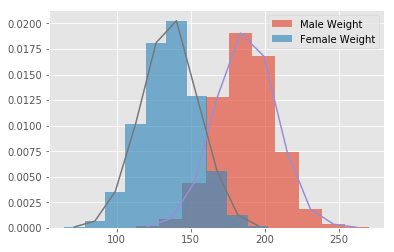

In [20]:
_ = plt.hist(df_male['Weight'], bins=10, alpha=0.65, density=1,label='Male Weight')
_ = plt.hist(df_female['Weight'], bins=10, alpha=0.65, density=1, label='Female Weight')
_ = plt.plot(wmx, wmy)
_ = plt.plot(wfx, wfy)
plt.legend()
plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

In [27]:
import scipy.stats as stats
import seaborn as sns

sns.distplot(df_male['Height'], cumulative=True, hist_kws={
                                            'linewidth': 2,
                                            'alpha': 0.4,
                                            'label': 'Histogram',
})
sns.distplot(df_female['Height'], hist_kws={
                                            'linewidth': 2,
                                            'alpha': 0.4,
                                            'label': 'Histogram'
})
plt.show()

TypeError: distplot() got an unexpected keyword argument 'cumulative'

Text(0.5,1,'Comparing Weights')

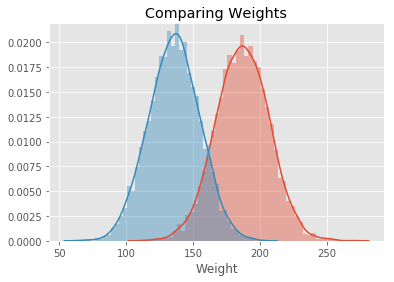

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.